# load model

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

# Reload the module to pick up changes
import importlib
import module
import support

importlib.reload(module)
importlib.reload(support)

from module import NumberRecognition, load_model_parameters
from support import load_mnist_data

In [16]:
# Determine device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [17]:
# Load the saved model parameters  
recognition_model = load_model_parameters(NumberRecognition(), 'number-recognition/local_data/models/number_recognition_model.pth')
print("Model loaded successfully!")
recognition_model

Model loaded successfully!


NumberRecognition(
  (fc_head): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=10, bias=True)
    (7): LogSoftmax(dim=1)
  )
)

# load data

In [18]:
# Load data from www.openml.org
mnist_path = r'local_data/mnist.pickle'
X, y = load_mnist_data(mnist_path)

print(f"Dataset shapes: X={X.shape}, y={y.shape}")

Dataset shapes: X=(70000, 784), y=(70000,)


# Prediction

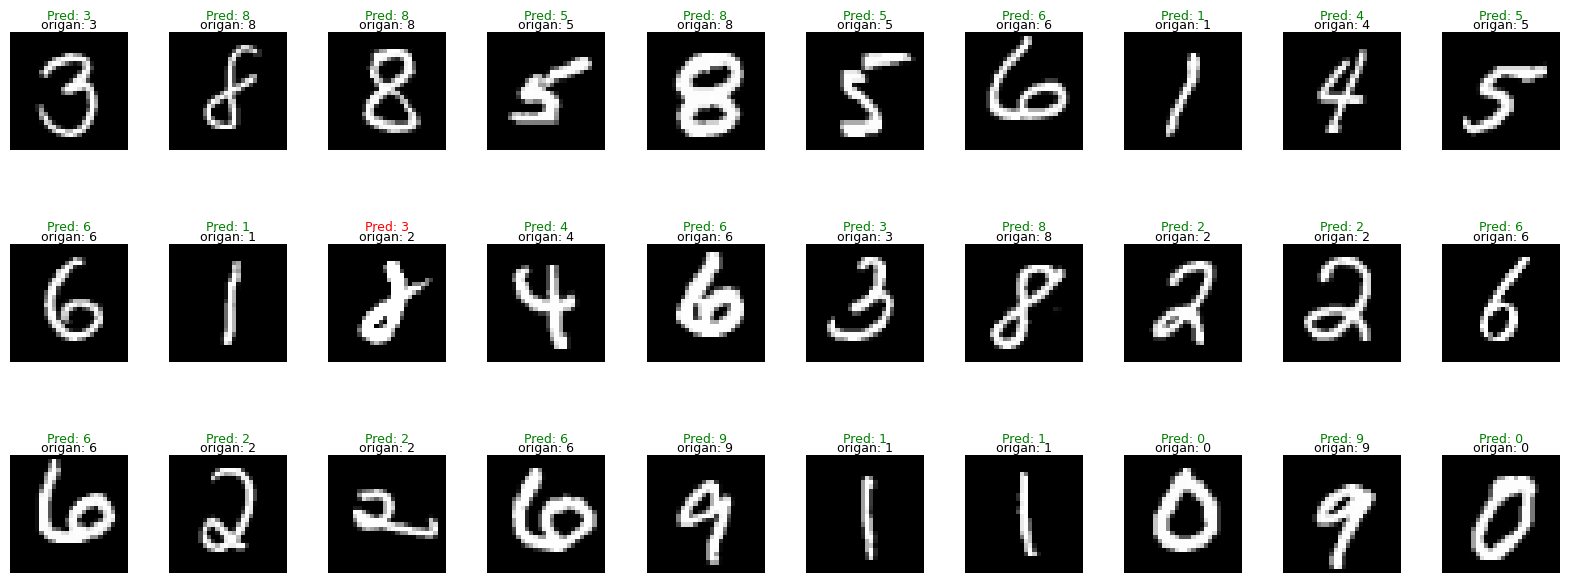

In [30]:
# Run predictions for N random test images and display results (max 10 per row)

display_quantity = 30  # change this number as desired
display_quantity = int(display_quantity)
recognition_model = recognition_model.to(device)
recognition_model.eval()
inds = np.random.choice(len(X), display_quantity, replace=False)
cols = min(10, display_quantity)
rows = math.ceil(display_quantity / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2.5))
# flatten axes for easy indexing (handle case rows==1 or cols==1)
if isinstance(axes, np.ndarray):
    axes_flat = axes.flatten()
else:
    axes_flat = [axes]

for i, idx in enumerate(inds):
    ax = axes_flat[i]
    img = X[idx].reshape(28,28)
    inp = torch.tensor(X[idx], dtype=torch.float32, device=device).unsqueeze(0)

    with torch.no_grad():
        out = recognition_model(inp) # logits
        probs = torch.exp(out)
        pred = int(probs.argmax(dim=1).item())

    origan = int(y[idx])
    ok = (pred == origan)
    pred_color = 'green' if ok else 'red'
    ax.imshow(img, cmap='gray', interpolation='nearest')
    # show Pred (colored) and origan above the image
    ax.text(0.5, 1.08, f'Pred: {pred}', transform=ax.transAxes, ha='center', va='bottom', color=pred_color, fontsize=9)
    ax.text(0.5, 1.00, f'origan: {origan}', transform=ax.transAxes, ha='center', va='bottom', color='black', fontsize=9)
    ax.axis('off')

# turn off any unused subplots
for j in range(len(inds), rows * cols):
    axes_flat[j].axis('off')
plt.subplots_adjust(wspace=0.35, hspace=0.6, top=0.85)
plt.show()
